# Time series forecasting using ARIMA

Use ARIMA for univariate forecasting.

Use ARIMAX or SARIMAX when you want to include additional (exogenous) variables.

Use VAR if you're modeling several interdependent time series together (e.g. forecasting multiple variables simultaneously).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split


In [2]:
# Create a toy dataset
np.random.seed(42)
date_range = pd.date_range(start='2020-01-01', periods=100, freq='W')
sales = np.random.normal(200, 10, size=100) + np.linspace(0, 50, 100)  # trend
advertising = np.random.normal(30, 5, size=100)
price = np.random.normal(10, 1, size=100)

df = pd.DataFrame({
    'Date': date_range,
    'Sales': sales,
    'Advertising': advertising,
    'Price': price
})
df.set_index('Date', inplace=True)
df.head()


,Sales,Advertising,Price
Date,,,
2020-01-05,204.967142,22.923146,10.357787
2020-01-12,199.122407,27.896773,10.560785
2020-01-19,207.486986,28.286427,11.083051
2020-01-26,216.745450,25.988614,11.053802
2020-02-02,199.678668,29.193571,8.622331


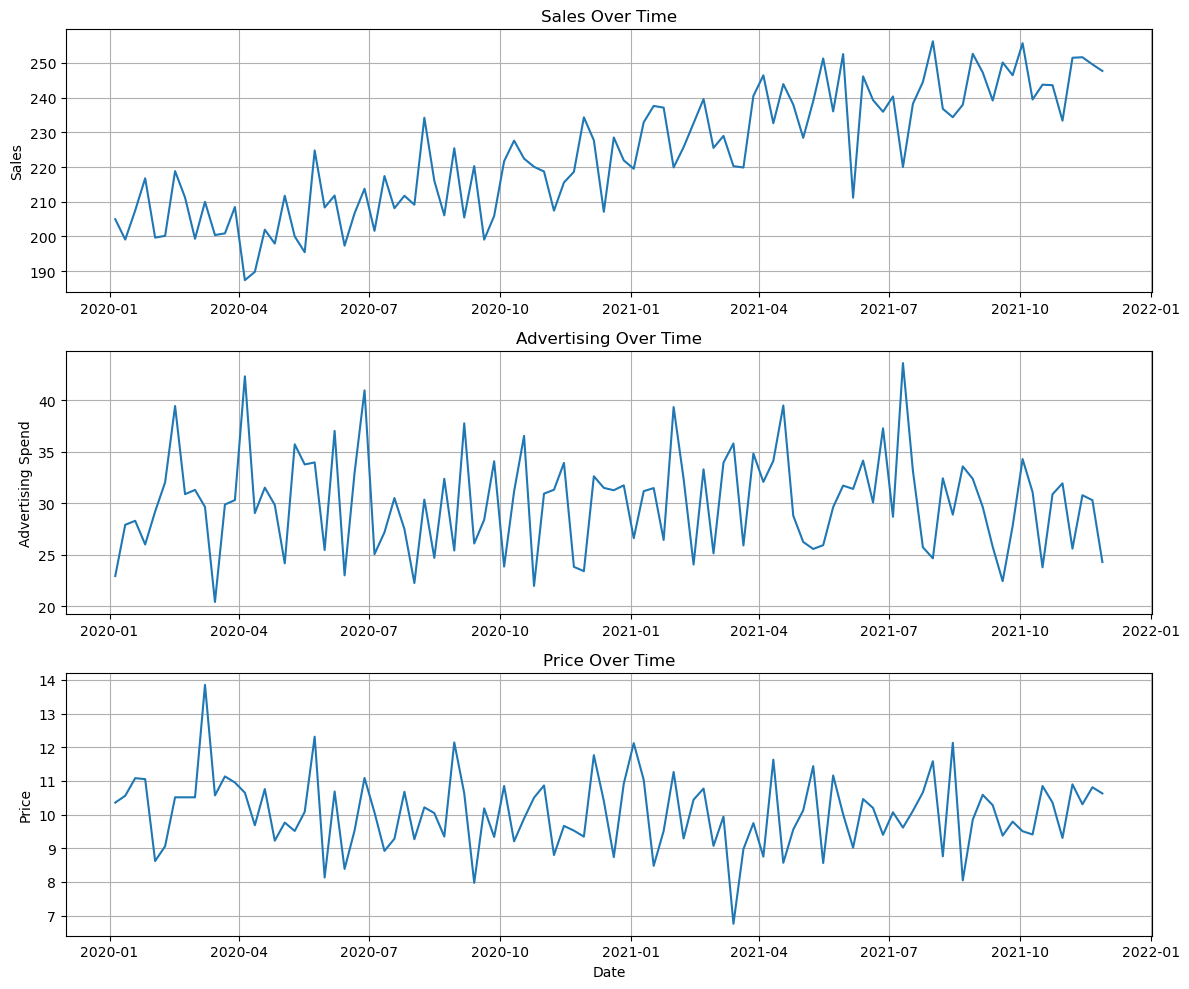

In [6]:
# Create figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))

# Plot Sales
ax1.plot(df.index, df['Sales'])
ax1.set_title('Sales Over Time')
ax1.set_ylabel('Sales')
ax1.grid(True)

# Plot Advertising
ax2.plot(df.index, df['Advertising'])
ax2.set_title('Advertising Over Time')
ax2.set_ylabel('Advertising Spend')
ax2.grid(True)

# Plot Price
ax3.plot(df.index, df['Price'])
ax3.set_title('Price Over Time')
ax3.set_ylabel('Price')
ax3.set_xlabel('Date')
ax3.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Train Test Split

In [7]:
train = df.iloc[:-12]
test = df.iloc[-12:]

y_train = train['Sales']
X_train = train[['Advertising', 'Price']]
y_test = test['Sales']
X_test = test[['Advertising', 'Price']]


# Fit ARIMAX (SARIMAX with no seasonality)

In [8]:
model = SARIMAX(y_train,
                exog=X_train,
                order=(1, 1, 1),  # ARIMA(p,d,q)
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)


/programs/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/programs/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


# Forecast

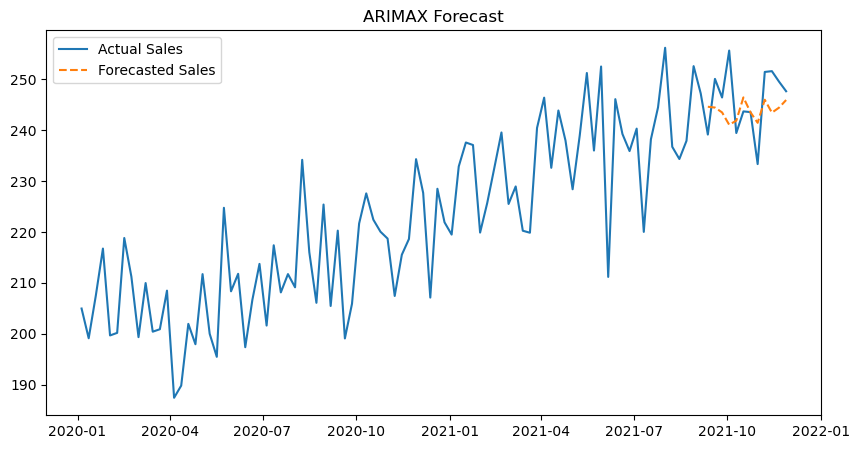

In [9]:
forecast = results.predict(start=len(train), end=len(train) + len(test) - 1, exog=X_test)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Sales'], label='Actual Sales')
plt.plot(test.index, forecast, label='Forecasted Sales', linestyle='--')
plt.legend()
plt.title('ARIMAX Forecast')
plt.show()
